In [5]:
pip install spinepose

  Using cached spinepose-1.0.1-py3-none-any.whl.metadata (7.9 kB)
  Using cached anytree-2.13.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached OneEuroFilter-0.2.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached onnxruntime-1.22.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (4.8 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.6.77-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.6.77-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.6.80-py3-none-manylinux

In [3]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 7.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Imports
import sys
import os
sys.path.append(os.path.abspath(".."))
from pipeline.spinepose_images import SpineKeypointProcessor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from IPython.display import clear_output
import pandas as pd
from pipeline.feature_df_builder import SpineFeatureBuilder

In [3]:
path_images_train = os.path.abspath(os.path.join(os.getcwd(), '..' 'data', 'raw_images', 'archive', 'images', 'train'))
path_images_val = os.path.abspath(os.path.join(os.getcwd(), '..' 'data', 'raw_images', 'archive', 'images', 'val'))
path_spine_coords_train = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'raw_images', 'archive', 'spine_coords', 'train'))
path_spine_coords_val = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'raw_images', 'archive', 'spine_coords', 'val'))

In [3]:
spine_coords_processor_train = SpineKeypointProcessor(path_images_train, path_spine_coords_train)
spine_coords_processor_val = SpineKeypointProcessor(path_images_val, path_spine_coords_val)

In [4]:
spine_coords_processor_train.process_images()
spine_coords_processor_val.process_images()

array([[[123.51813205, 234.45301855],
        [117.90692298, 227.71956742],
        [114.54019753, 229.96405113],
        [ 94.33984486, 242.30871153],
        [ 97.70657031, 242.30871153],
        [ 77.50621764, 298.42080426],
        [ 85.36191034, 308.52098095],
        [113.41795572, 362.38858998],
        [113.41795572, 381.46670151],
        [142.5962429 , 325.35460877],
        [178.50798098, 370.24428296],
        [ 79.75070127, 421.86740828],
        [ 78.62845945, 442.06776166],
        [154.94090287, 339.94375288],
        [172.89677191, 383.71118522],
        [188.60815732, 436.45655239],
        [269.40956799, 438.7010361 ],
        [ 90.97311942, 210.8859396 ],
        [ 83.11742671, 283.27053922],
        [ 68.52828312, 431.96758497],
        [236.86455536, 438.7010361 ],
        [327.76614237, 440.9455198 ],
        [227.88662084, 440.9455198 ],
        [323.27717511, 452.16793835],
        [179.6302228 , 452.16793835],
        [268.28732618, 454.41242206],
        [ 68

In [5]:
spine_coords_processor_train.save_keypoints()

In [6]:
spine_coords_processor_val.save_keypoints()

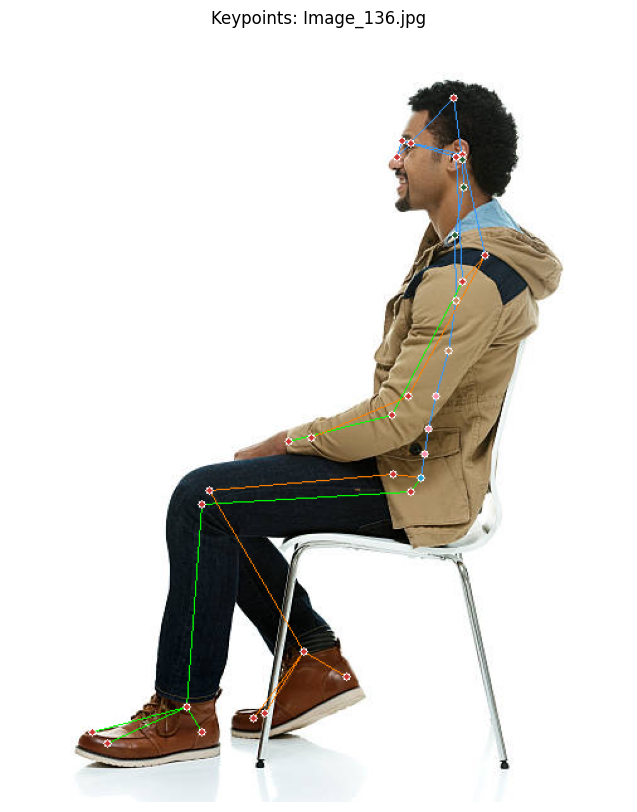

In [7]:
spine_coords_processor_train.visualize_keypoints(index=30)

In [2]:
file_path_spine_train = os.path.join(os.getcwd(), 'data', 'raw_images', 'archive', 'spine_coords', 'train', 'spine_keypoints.json')
file_path_spine_val = os.path.join(os.getcwd(), 'data', 'raw_images', 'archive', 'spine_coords', 'val', 'spine_keypoints.json')

spine_indices_order = [17, 18, 19, 26, 27, 28, 29, 30, 35, 36]

In [ ]:

spine_train_builder = SpineFeatureBuilder(file_path_spine_train, spine_indices_order)
spine_train_builder.load_keypoints()
spine_train_builder.build_features()
df_spine_train = spine_train_builder.get_features_dataframe()

print(df_spine_train.head())



  image_filename  X_17  Y_17       X_18        Y_18       X_19        Y_19  \
0    Image_1.jpg   0.0   0.0 -69.202480  213.898568 -91.221450  657.423540   
1   Image_10.jpg   0.0   0.0 -31.908574   42.278861 -14.890668  137.206869   
2  Image_101.jpg   0.0   0.0 -14.103727   48.876707 -24.316770  155.627327   
3  Image_102.jpg   0.0   0.0   4.307963   70.650585 -34.463701  191.847930   
4  Image_104.jpg   0.0   0.0  38.232549   92.587259  63.567370  289.277605   

        X_26        Y_26       X_27  ...  dist_30_35  dist_35_36  \
0 -93.482327  613.189002 -95.743203  ...  194.192603   49.235915   
1 -18.480383  130.650654 -22.070097  ...   43.488441    9.587333   
2 -24.331968  145.148319 -24.347166  ...   45.576432    8.493483   
3 -30.703209  180.916475 -26.942716  ...   53.828849   12.171212   
4  60.846756  271.212149  58.126142  ...   81.234190   25.145675   

   angle_17_18_19  angle_18_19_26  angle_19_26_27  angle_26_27_28  \
0      164.914218        5.768043      179.999999    

In [5]:
spine_val_builder = SpineFeatureBuilder(file_path_spine_val, spine_indices_order)
spine_val_builder.load_keypoints()
spine_val_builder.build_features()
df_spine_val = spine_val_builder.get_features_dataframe()

print(df_spine_val.head())

  image_filename  X_17  Y_17       X_18        Y_18       X_19        Y_19  \
0    Image_0.jpg   0.0   0.0   8.461304  127.523943  21.757639  403.725091   
1    Image_1.jpg   0.0   0.0   0.934716  108.894440  -5.608297  364.539328   
2   Image_12.jpg   0.0   0.0 -17.700298   65.743967   4.214357  198.074771   
3   Image_13.jpg   0.0   0.0  -5.535915  108.764454 -53.405299  282.657325   
4   Image_16.jpg   0.0   0.0 -27.629733  105.516993 -75.267203  306.785298   

        X_26        Y_26       X_27  ...  dist_30_35  dist_35_36  \
0  19.151255  376.206965  16.544871  ...  117.509735   25.498773   
1  -4.060174  337.213483  -2.512050  ...  102.127372   23.442564   
2  -1.079929  184.536150  -6.374215  ...   60.023154   14.720116   
3 -49.548476  265.744289 -45.691653  ...   86.219083   20.932480   
4 -70.741644  285.192126 -66.216084  ...   89.549651   23.361795   

   angle_17_18_19  angle_18_19_26  angle_19_26_27  angle_26_27_28  \
0      178.960042        2.654545      179.999999    

In [6]:
path_features_train = os.path.join(os.getcwd(), 'data', 'raw_images', 'archive', 'features', 'train', 'features.csv')
path_features_val = os.path.join(os.getcwd(), 'data', 'raw_images', 'archive', 'features', 'features.csv')

In [7]:
df_spine_train.to_csv(path_features_train, encoding='utf-8', index=False)
df_spine_val.to_csv(path_features_val, encoding='utf-8', index=False)
